# Random Forest: Clasificación 


Se elijio este método de ensamble basado en árboles de decisión entrenados aleatoriamente con el objetivo de disminuir la varianza y evitar sobre-entrenamiento.

Ventajas:
Método robusto
Evita sobre-entrenamiento
Disminuye la varianza en la predicción respecto a los árboles de decisión
Prioriza las características más importantes

Desventajas:
Pueden ser lentos con grandes cantidades de datos
La interpretación del modelo no es transparente:

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#cargar librerias
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Carga del dataset
# link al csv de la encuesta
# https://docs.google.com/spreadsheets/d/12JOIifaUdaTBLks6ESjN8_iq9Jd9LyP9B6zIixfZBlQ/edit#gid=1424447045
df_estilos_aprendizaje = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/estilos_aprendizaje_codificado.csv')


# Muestra datos
df_estilos_aprendizaje.head()

,v,a,k,v_percent,a_percent,k_percent,grado_max_estudios,sexo,edicion_saturdays_ai,area,...,33,34,35,36,37,38,39,40,estilo_primario-encoded,estilo_primario
0,20,10,10,50.0,25.0,25.0,2.0,0.0,4.0,0.0,...,2.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,2.0,visual
1,10,20,10,25.0,50.0,25.0,2.0,1.0,4.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,auditivo
2,13,9,18,32.5,22.5,45.0,2.0,1.0,4.0,1.0,...,2.0,1.0,2.0,2.0,0.0,0.0,1.0,2.0,1.0,kinestesico
3,16,7,17,40.0,17.5,42.5,2.0,1.0,4.0,1.0,...,0.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0,1.0,kinestesico
4,13,16,11,32.5,40.0,27.5,2.0,1.0,4.0,1.0,...,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,auditivo


In [4]:
df_estilos_aprendizaje.dtypes

v                            int64
a                            int64
k                            int64
v_percent                  float64
a_percent                  float64
k_percent                  float64
grado_max_estudios         float64
sexo                       float64
edicion_saturdays_ai       float64
area                       float64
sector                     float64
1                          float64
2                          float64
3                          float64
4                          float64
5                          float64
6                          float64
7                          float64
8                          float64
9                          float64
10                         float64
11                         float64
12                         float64
13                         float64
14                         float64
15                         float64
16                         float64
17                         float64
18                  

In [5]:
df_estilos_aprendizaje.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   v                        50 non-null     int64  
 1   a                        50 non-null     int64  
 2   k                        50 non-null     int64  
 3   v_percent                50 non-null     float64
 4   a_percent                50 non-null     float64
 5   k_percent                50 non-null     float64
 6   grado_max_estudios       50 non-null     float64
 7   sexo                     50 non-null     float64
 8   edicion_saturdays_ai     50 non-null     float64
 9   area                     50 non-null     float64
 10  sector                   50 non-null     float64
 11  1                        50 non-null     float64
 12  2                        50 non-null     float64
 13  3                        50 non-null     float64
 14  4                        50 

In [6]:
# Seleccionamos las características para el modelo
data = df_estilos_aprendizaje[[
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40','estilo_primario']]
data.head()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,estilo_primario
0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,visual
1,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,auditivo
2,1.0,2.0,1.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,...,2.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,2.0,kinestesico
3,0.0,0.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,2.0,...,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0,kinestesico
4,1.0,2.0,1.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,auditivo


In [7]:
# Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1                50 non-null     float64
 1   2                50 non-null     float64
 2   3                50 non-null     float64
 3   4                50 non-null     float64
 4   5                50 non-null     float64
 5   6                50 non-null     float64
 6   7                50 non-null     float64
 7   8                50 non-null     float64
 8   9                50 non-null     float64
 9   10               50 non-null     float64
 10  11               50 non-null     float64
 11  12               50 non-null     float64
 12  13               50 non-null     float64
 13  14               50 non-null     float64
 14  15               50 non-null     float64
 15  16               50 non-null     float64
 16  17               50 non-null     float64
 17  18               5

In [8]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
X = data.drop(["estilo_primario"],axis = 1)

# y es nuestra variable dependiente
y = data.estilo_primario

# División 75% de datos para entrenamiento, 25% de daatos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [9]:
# Creaamos el modelo de Bosques Aleatorios (y configuramos el número de estimadores (árboles de decisión))
BA_model = RandomForestClassifier(n_estimators = 100, 
                                  random_state = 0,
                                  min_samples_leaf = 8,)

In [10]:
BA_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=8, random_state=0)

In [12]:
len(BA_model.estimators_)

100

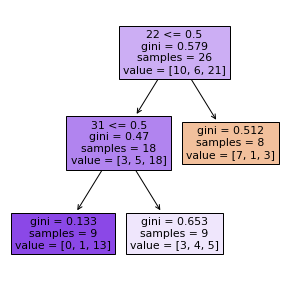

In [27]:
from sklearn import tree
plt.figure(figsize=(5,5))
_ = tree.plot_tree(BA_model.estimators_[0], feature_names=X.columns, filled=True)

In [38]:
# Accuracy promedio
BA_model.score(X_test, y_test)

0.6153846153846154

In [31]:
y_pred=BA_model.predict(X_test)

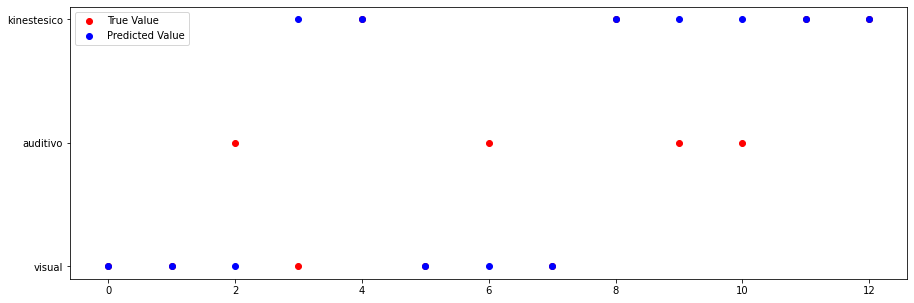

In [32]:
index = np.arange(0,len(y_test))
fig, ax = plt.subplots(1,1,figsize=(15,5))
plt.scatter(index,y_test,c="red",label = 'True Value')
plt.scatter(index,y_pred,c="blue", label = 'Predicted Value')

plt.legend()

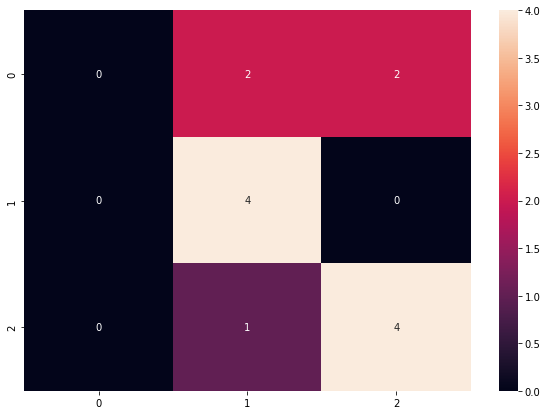

In [33]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicción del modelo usando los datos de prueba
y_pred = BA_model.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(matriz, annot=True)

In [48]:
# Seleccionamos las características para el modelo
data2 = df_estilos_aprendizaje[[
      'sexo','sector', 'grado_max_estudios','edicion_saturdays_ai','area',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40','estilo_primario']]
data2.head()

,sexo,sector,grado_max_estudios,edicion_saturdays_ai,area,1,2,3,4,5,...,32,33,34,35,36,37,38,39,40,estilo_primario
0,0.0,2.0,2.0,4.0,0.0,0.0,2.0,1.0,0.0,0.0,...,0.0,2.0,1.0,2.0,1.0,2.0,0.0,0.0,2.0,visual
1,1.0,4.0,2.0,4.0,1.0,0.0,0.0,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,auditivo
2,1.0,4.0,2.0,4.0,1.0,1.0,2.0,1.0,1.0,0.0,...,2.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,2.0,kinestesico
3,1.0,4.0,2.0,4.0,1.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0,kinestesico
4,1.0,3.0,2.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,auditivo


In [49]:
# Información del dataset
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sexo                  50 non-null     float64
 1   sector                50 non-null     float64
 2   grado_max_estudios    50 non-null     float64
 3   edicion_saturdays_ai  50 non-null     float64
 4   area                  50 non-null     float64
 5   1                     50 non-null     float64
 6   2                     50 non-null     float64
 7   3                     50 non-null     float64
 8   4                     50 non-null     float64
 9   5                     50 non-null     float64
 10  6                     50 non-null     float64
 11  7                     50 non-null     float64
 12  8                     50 non-null     float64
 13  9                     50 non-null     float64
 14  10                    50 non-null     float64
 15  11                    50 

In [50]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# X son nuestras variables independientes
X = data2.drop(["estilo_primario"],axis = 1)

# y es nuestra variable dependiente
y = data2.estilo_primario

# División 75% de datos para entrenamiento, 25% de daatos para test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [51]:
# Creaamos el modelo de Bosques Aleatorios (y configuramos el número de estimadores (árboles de decisión))
BA_model2 = RandomForestClassifier(n_estimators = 100, 
                                  random_state = 0,
                                  min_samples_leaf = 8,)

In [52]:
BA_model2.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=8, random_state=0)

In [53]:
len(BA_model2.estimators_)

100

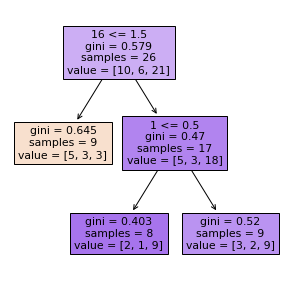

In [54]:
from sklearn import tree
plt.figure(figsize=(5,5))
_ = tree.plot_tree(BA_model.estimators_[0], feature_names=X.columns, filled=True)

In [57]:
# Accuracy promedio
BA_model2.score(X_test, y_test)

0.5384615384615384

In [59]:
y_pred=BA_model2.predict(X_test)

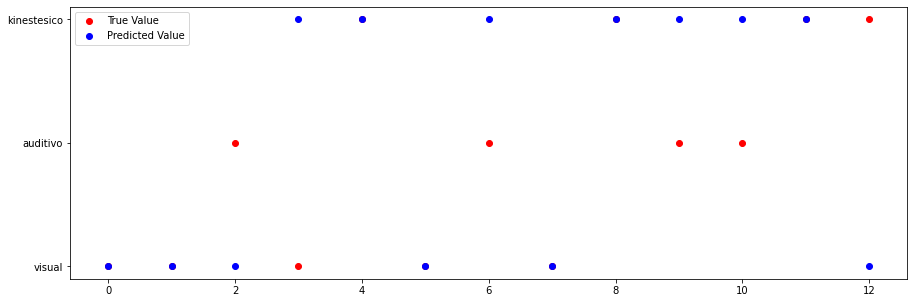

In [60]:
index = np.arange(0,len(y_test))
fig, ax = plt.subplots(1,1,figsize=(15,5))
plt.scatter(index,y_test,c="red",label = 'True Value')
plt.scatter(index,y_pred,c="blue", label = 'Predicted Value')

plt.legend()

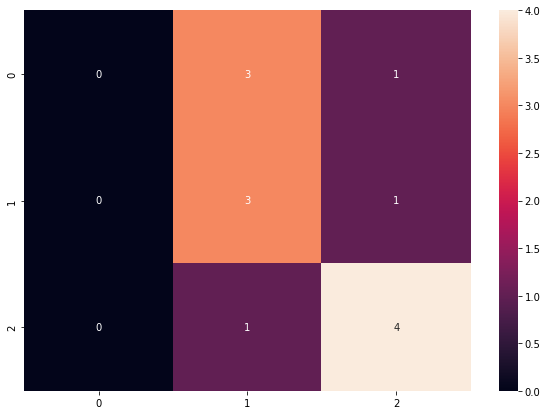

In [62]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicción del modelo usando los datos de prueba
y_pred = BA_model.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(matriz, annot=True)

# Conclusiones
Hemos aplicado el modelo de ***clasificacion de random forest*** y  los datos  correspondientes a las 40 preguntas del test vak.

Dentro de este modelo esta clasifiando una clave que es estilo_primario contra el resto de las demas 